## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[19, 92, 96],
       [47, 54, 79],
       [53, 60, 72],
       [45, 61, 95],
       [12, 25, 29],
       [57, 84, 87]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([19, 92, 96]), array([47, 54, 79]))

The lowest card in the game is

In [5]:
np.min(cards)

12

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [7]:
def runExperimentFindLowest():
    lowest = np.empty(10000, dtype=int)

    for i in range(10000):
        cards = sample_cards(100, 6, 3)
        lowest[i] = np.min(cards)

    return np.sort(lowest)


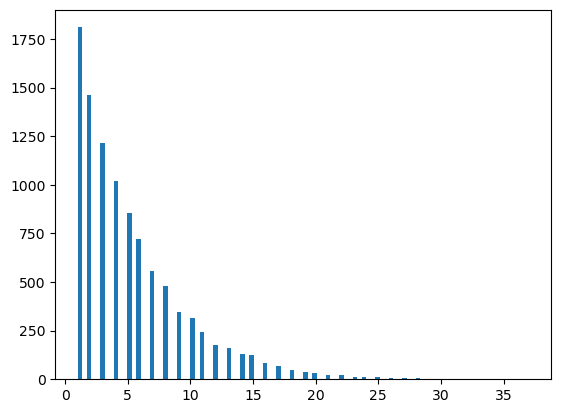

In [8]:
lowest = runExperimentFindLowest()
plt.hist(lowest, bins=100);

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

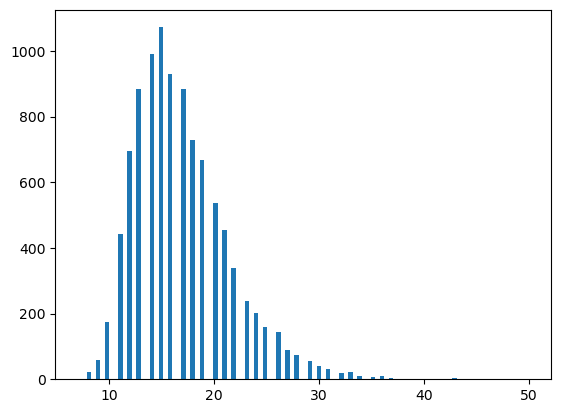

In [9]:
def findLargestGap(cards):
    largestGap = cards[1] - cards[0]
    for i in range(len(cards) - 1):
        current = cards[i + 1] - cards[i]
        if current > largestGap:
            largestGap = current

    return largestGap

maxgap = np.empty(10000, dtype=int)
for i in range(10000):
    cards = sample_cards(100, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    maxgap[i] = findLargestGap(cards)

plt.hist(maxgap, bins=100);  

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

16.369

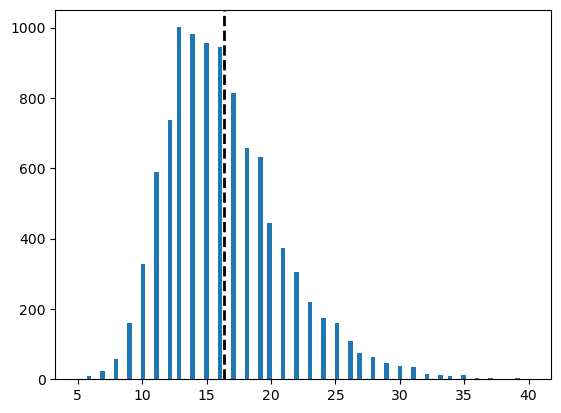

In [10]:
#take the number of players, run a for loop 
#compare player 1s card to other cards 
#find the largest gap, save, 
#repeat for player 2 and so on

def toTup(players, cardNum, cards):
    cardsAndRows = []
    for i in range(players):
        for j in range(cardNum):
            tempCard = cards[i][j]
            newTup = (i, tempCard)
            cardsAndRows.append(newTup)
            
    return cardsAndRows

def findLargestGapTup(cards):
    largestGap = cards[1][1] - cards[0][1]
    for i in range(len(cards) - 1):
        current = cards[i + 1][1] - cards[i][1]
        if current > largestGap and cards[i + 1][0] != cards[i][0]:
            largestGap = current

    return largestGap

def runner(playNum, cardNum):
    maxgap = np.empty(10000, dtype=int)
    for i in range(10000):
        cards = sample_cards(100, playNum, cardNum)
        cards = toTup(playNum, cardNum, cards)
        cards.sort(key=lambda cards: cards[1])
        maxgap[i] = findLargestGapTup(cards)
    return maxgap
maxgap = runner(6,3)
plt.hist(maxgap, bins=100);  
plt.axvline(maxgap.mean(), color='black', linestyle='dashed', linewidth=2)
np.mean(maxgap)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Text(0.5, 1.0, 'Four cards distributed, Six players')

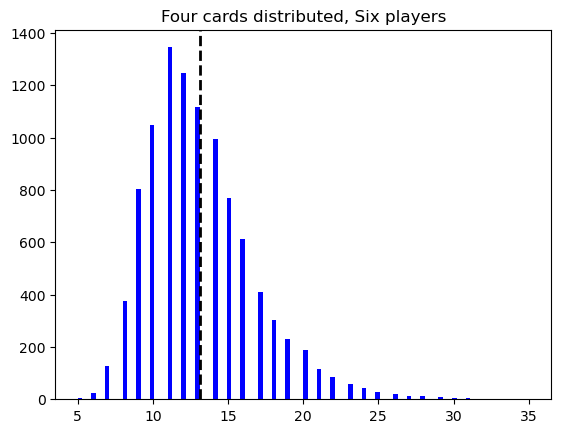

In [11]:

maxgap1 = runner(6,4)
plt.hist(maxgap1, bins=100, color='blue')
plt.axvline(maxgap1.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Four cards distributed, Six players')


Text(0.5, 1.0, 'Four cards distributed, Four players')

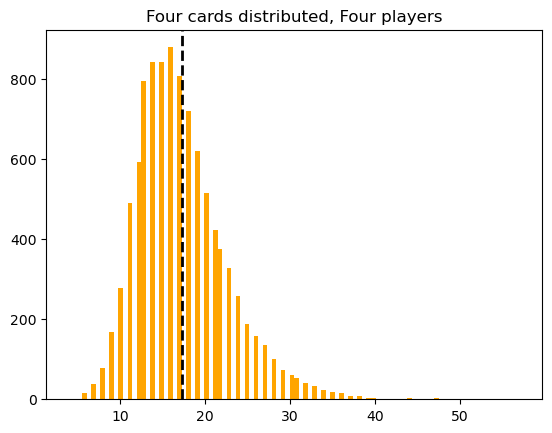

In [12]:

maxgap2 = runner(4,4)
plt.hist(maxgap2, bins=100, color='orange')
plt.axvline(maxgap2.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Four cards distributed, Four players')

Text(0.5, 1.0, 'Two cards distributed, Four players')

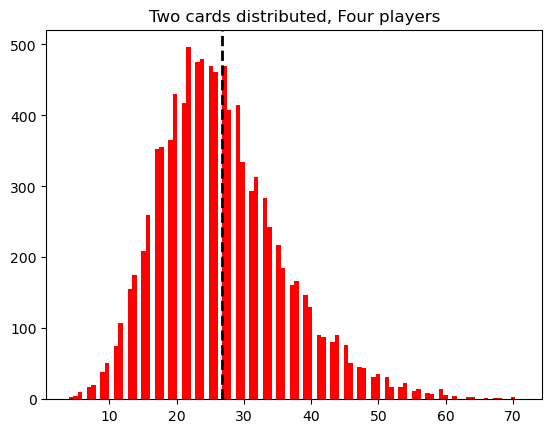

In [13]:

maxgap1 = runner(4,2)
plt.hist(maxgap1, bins=100, color='red')
plt.axvline(maxgap1.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Two cards distributed, Four players')


Text(0.5, 1.0, 'Two Cards distributed, Six players')

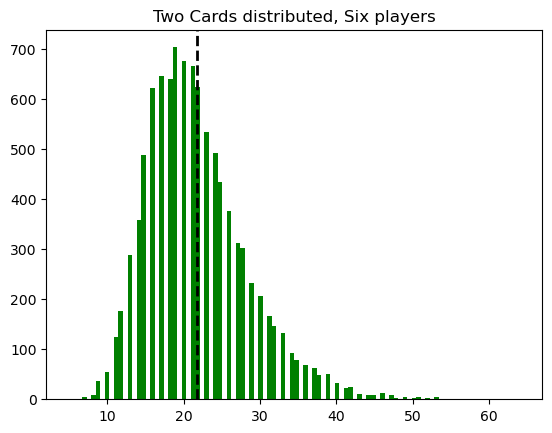

In [14]:

maxgap1 = runner(6,2)
plt.hist(maxgap1, bins=100, color='green')
plt.axvline(maxgap1.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Two Cards distributed, Six players')

Text(0.5, 1.0, 'Six cards distributed, Six players')

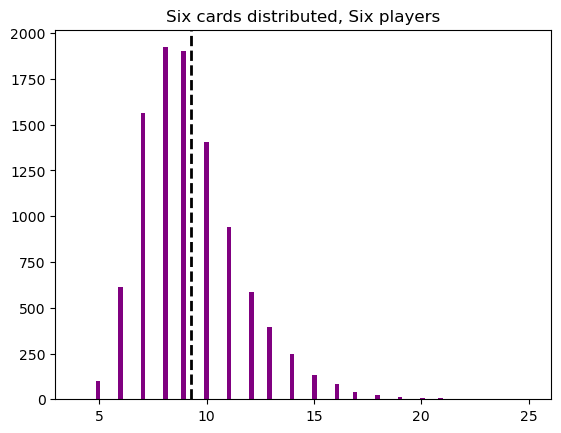

In [15]:

maxgap1 = runner(6,6)
plt.hist(maxgap1, bins=100, color='purple')
plt.axvline(maxgap1.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Six cards distributed, Six players')

The difference between the mean of distributions is that generally more players and more cards lead to smaller gaps while having less player or less cards distributed per person will lead to smaller gaps. Adding more players to the game, as shown in the simulations will lead to a lower mean difference in the largest gap.  

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

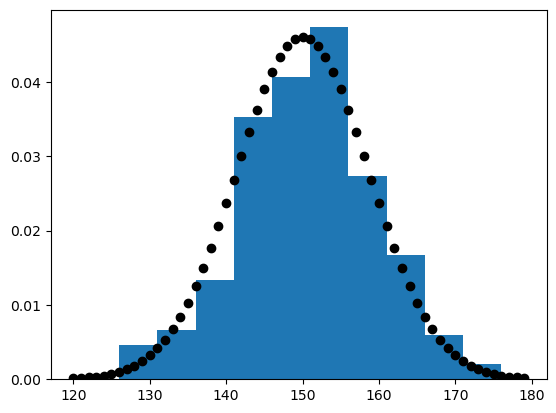

In [16]:
from scipy.stats import binom
#p is the prob that a card has a value more than 50,000 in a game of 100000 cards and 300 players given 300 cards each
cards = sample_cards(100000, 300, 300)
hist_data = np.sum(cards > 50000,axis=1)
plt.hist(hist_data, density=True)
plt.scatter(np.arange(120,180), binom.pmf(np.arange(120, 180), 300, .5), c='black')
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

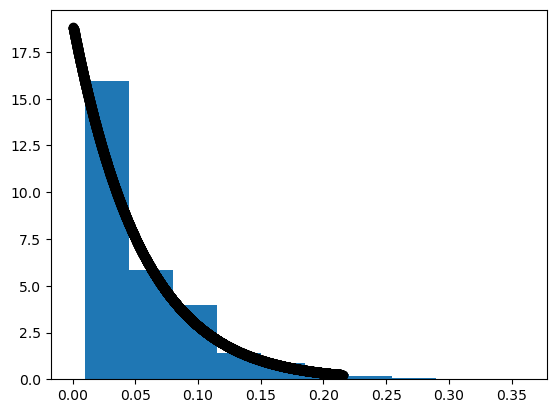

In [17]:
np.random.seed(1300)
from scipy.stats import beta
smallest = []
for i in range(10000):
    cards = sample_cards(100, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/100)
    
#from scipy.stats import beta
plt.hist(smallest, density=True);
x = np.linspace(beta.ppf(0.01, 1, 19),
                beta.ppf(0.99, 1, 19), 5000)

plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()
#ask how to change the x axis here 

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

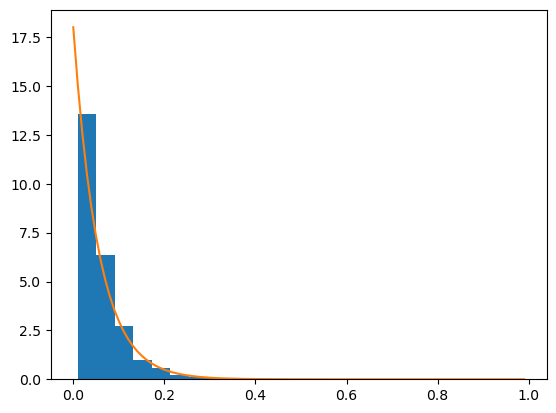

In [18]:
from scipy.stats import expon

smallest = []
for i in range(10000):
    cards = sample_cards(100, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0])
U = np.array(smallest) 
U = 1 - (np.divide(U, 100))

X = -np.log(U)

plt.hist(X, density=True);
plt.plot(np.arange(0,1,step=.01), expon.pdf(np.arange(0,1,step=.01), scale=1/18))
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

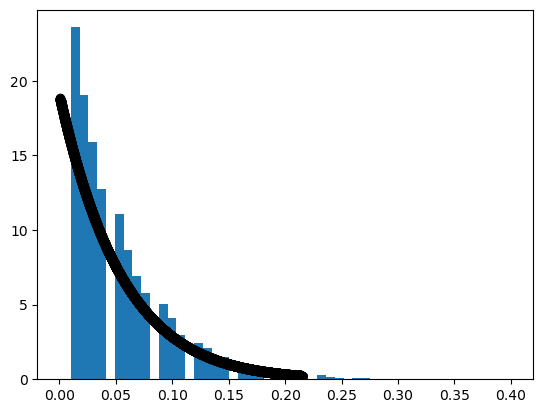

In [19]:
smallest = []
for i in range(10000):
    cards = sample_cards(100, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/100)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

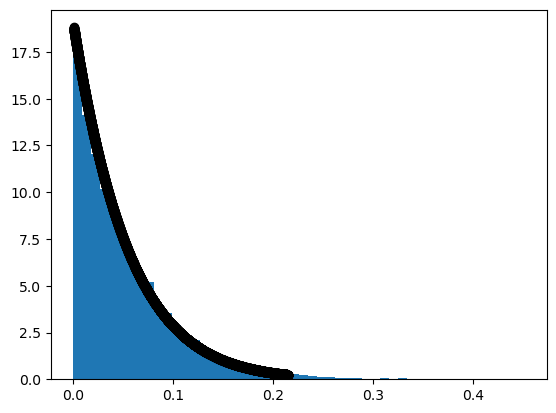

In [20]:
smallest = []
for i in range(10000):
    cards = sample_cards(10000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/10000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

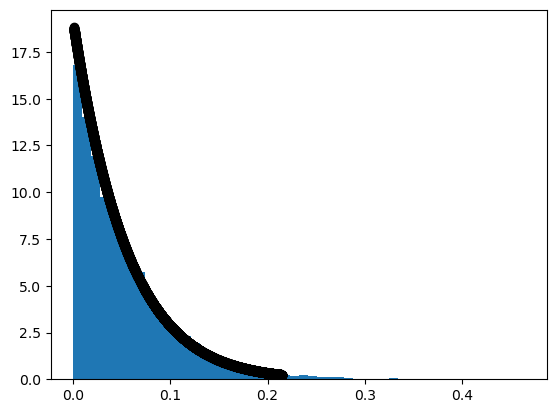

In [21]:
smallest = []
for i in range(10000):
    cards = sample_cards(100000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/100000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

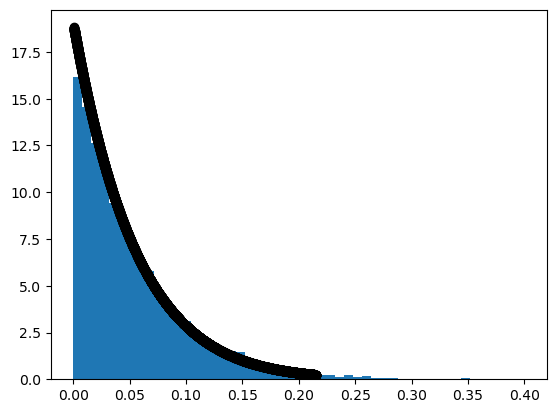

CPU times: user 3min 16s, sys: 37.4 s, total: 3min 53s
Wall time: 3min 53s


In [22]:
%%time

smallest = []
for i in range(10000):
    cards = sample_cards(1000000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/1000000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

As the number of cards gets larger (the lim as it reaches infinity), the distribution becomes closer to the true beta distribution. 

sampling with/o replacement now:

In [23]:
def sample_cards_replace_true(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

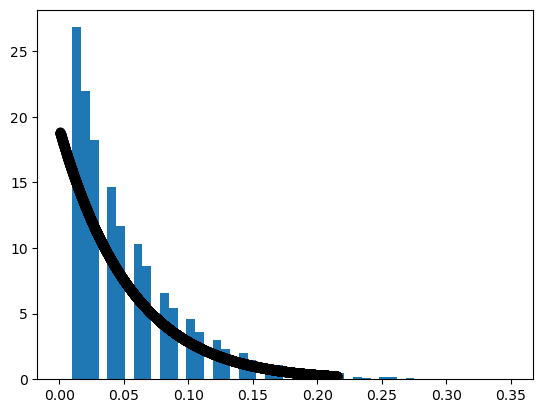

In [24]:
smallest = []
for i in range(10000):
    cards = sample_cards(100, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/100)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

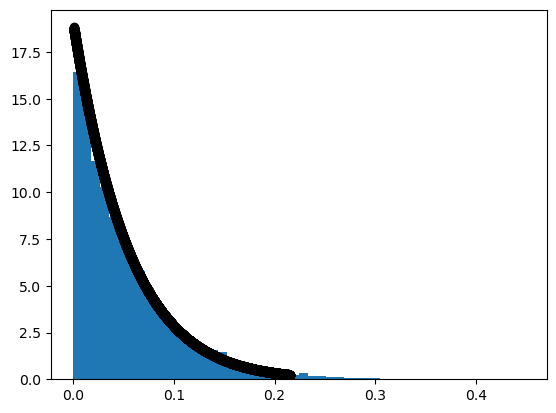

In [25]:
smallest = []
for i in range(10000):
    cards = sample_cards(10000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/10000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

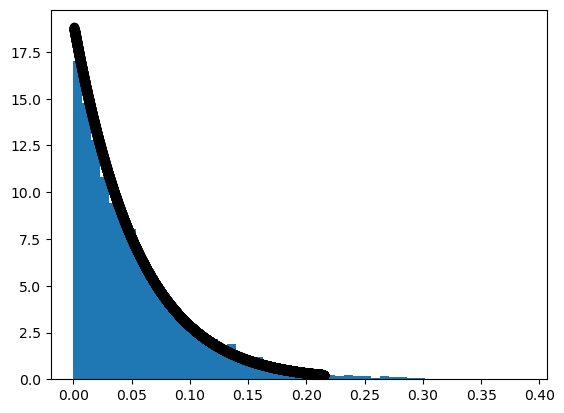

In [26]:
smallest = []
for i in range(10000):
    cards = sample_cards(100000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/100000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

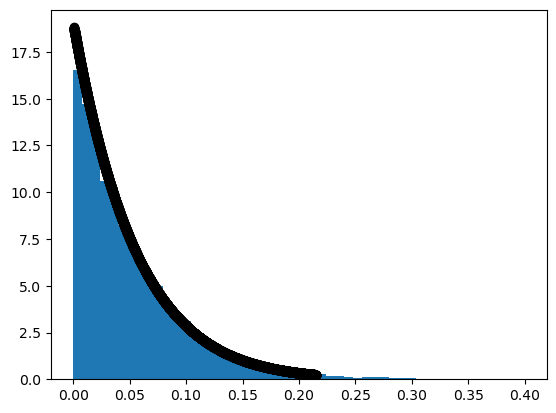

CPU times: user 3min 32s, sys: 38.3 s, total: 4min 10s
Wall time: 4min 10s


In [27]:
%%time

smallest = []
for i in range(10000):
    cards = sample_cards(1000000, 6, 3)
    cards = cards.flatten()
    cards = np.sort(cards)
    smallest.append(cards[0]/1000000)
    

#from scipy.stats import beta
plt.hist(smallest, density=True, bins=50);
plt.scatter(x, beta.pdf(x, 1, 19), c='black')
plt.show()

Difference with and without replacement: the tail on the distribution is longer, but both go to the beta distribution

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Jules Perez - jpere104
- Member No2: Rebecca Eliscu - Reliscu
- Member No3: Daniel Lewinsohndp - Lewinsohndp